In [1]:
import xarray as xr
import numpy as np

In [2]:
ds = xr.open_dataset('/g/data/rt52/era5/pressure-levels/monthly-averaged/t/1998/t_era5_moda_pl_19980101-19980131.nc')
t = ds['t'] # K

ERROR 1: PROJ: proj_create_from_database: Open of /g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/share/proj failed


In [3]:
ds = xr.open_dataset('/g/data/rt52/era5/pressure-levels/monthly-averaged/q/1998/q_era5_moda_pl_19980101-19980131.nc')
q= ds['q'] #mb

In [4]:
t

<xarray.DataArray 't' (time: 1, level: 37, latitude: 721, longitude: 1440)>
[38414880 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 1998-01-01
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

In [5]:
q

<xarray.DataArray 'q' (time: 1, level: 37, latitude: 721, longitude: 1440)>
[38414880 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 1998-01-01
Attributes:
    units:          kg kg**-1
    long_name:      Specific humidity
    standard_name:  specific_humidity

In [6]:
r = q # g/kg
p = t['level']*100 # Pa
e_s = 611.2 * np.exp(17.67*(t-273.15)/(t-29.66))
r_s = 0.622 * e_s/p
rh = (r/r_s)*100

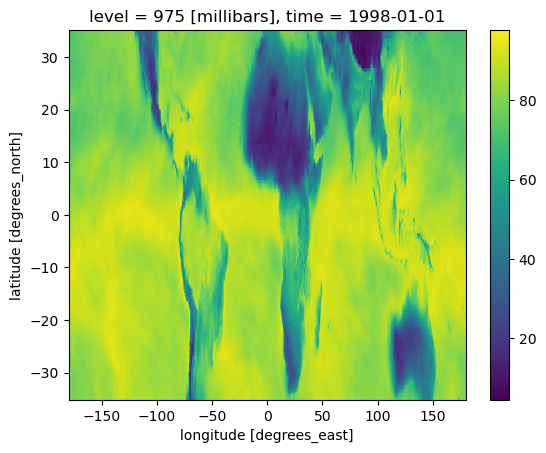

In [7]:
rh.sel(latitude=slice(35,-35)).sel(level= 975).plot()

In [12]:
a_mean = rh.mean(dim=('latitude', 'longitude', 'level'))
a_mean

<xarray.DataArray (time: 1)>
array([32.40021915])
Coordinates:
  * time     (time) datetime64[ns] 1998-01-01

In [17]:
rh['level'] = rh['level']*100

In [18]:
section = rh.sel(level = slice(0,850e2))
section.level

<xarray.DataArray 'level' (level: 31)>
array([  100,   200,   300,   500,   700,  1000,  2000,  3000,  5000,  7000,
       10000, 12500, 15000, 17500, 20000, 22500, 25000, 30000, 35000, 40000,
       45000, 50000, 55000, 60000, 65000, 70000, 75000, 77500, 80000, 82500,
       85000], dtype=int32)
Coordinates:
  * level    (level) int32 100 200 300 500 700 ... 75000 77500 80000 82500 85000

In [25]:
def calc_vertical_mean(da):
    da = da.sel(level=slice(0,850e2)) # free troposphere (most values at 1000 hPa over land are NaN)
    return (da * da['level']).sum(dim='level') / da['level'].sum(dim='level')

In [26]:
vMean = calc_vertical_mean(rh)

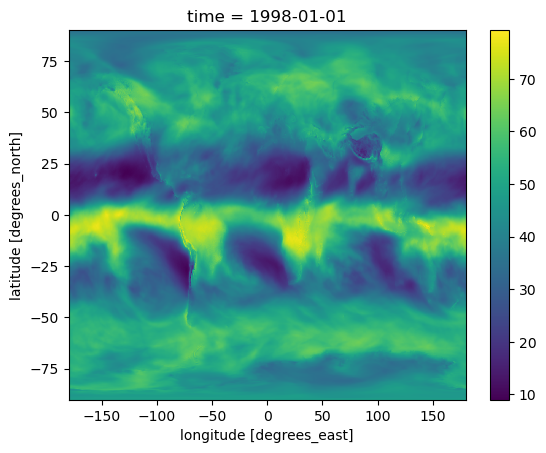

In [28]:
vMean.plot()

In [29]:
a = xr.open_dataset('/g/data/k10/cb4968/data/hur/metrics/hur_sMean/obs/ERA5_hur_sMean_monthly_regridded.nc')
a

<xarray.Dataset>
Dimensions:    (time: 288)
Coordinates:
  * time       (time) datetime64[ns] 1998-01-01 1998-02-01 ... 2021-12-01
Data variables:
    hur_sMean  (time) float64 ...

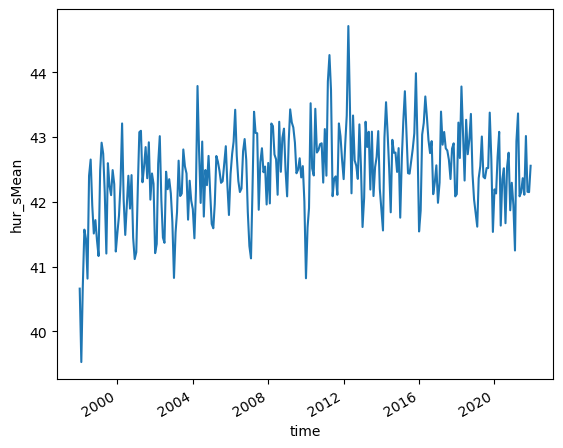

In [31]:
a['hur_sMean'].plot()

In [33]:
a['hur_sMean'].time[-5:]

<xarray.DataArray 'time' (time: 5)>
array(['2021-08-01T00:00:00.000000000', '2021-09-01T00:00:00.000000000',
       '2021-10-01T00:00:00.000000000', '2021-11-01T00:00:00.000000000',
       '2021-12-01T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2021-08-01 2021-09-01 ... 2021-12-01

In [8]:
# p = t['level']
# e_sat = 6.11 * 10**(7.5 * t / (237.7 + t))
# e = q*p / (0.622+0.378*q)
# da = (e/e_sat)*100

In [9]:
# w = q/(1-q)
# e = w * p / (0.622 + w)
# e_sat = 6.112 * np.exp((17.67 * t) / (t + 243.5)) # Magnus-Tetens approximation
# rh = (e/e_sat)*100